In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

## Data Exploration

In [2]:
# Load data
df = pd.read_csv('data.csv')
df.head(10)

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1676939580000,2023-02-21 00:33:00,BTC/USD,24859.34,24859.34,24859.34,24859.34,0.000000,0.000000
1,1676939520000,2023-02-21 00:32:00,BTC/USD,24821.96,24859.34,24821.96,24859.34,0.103099,2562.977818
2,1676939460000,2023-02-21 00:31:00,BTC/USD,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178
3,1676939400000,2023-02-21 00:30:00,BTC/USD,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450
4,1676939340000,2023-02-21 00:29:00,BTC/USD,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431
5,1676939280000,2023-02-21 00:28:00,BTC/USD,24809.28,24809.28,24809.27,24809.27,0.003961,98.279938
6,1676939220000,2023-02-21 00:27:00,BTC/USD,24809.28,24809.28,24809.28,24809.28,0.000000,0.000000
7,1676939160000,2023-02-21 00:26:00,BTC/USD,24809.28,24809.28,24809.28,24809.28,0.000000,0.000000
8,1676939100000,2023-02-21 00:25:00,BTC/USD,24821.31,24821.31,24809.28,24809.28,0.001361,33.758732
9,1676939040000,2023-02-21 00:24:00,BTC/USD,24817.20,24821.31,24811.49,24821.31,0.212014,5262.474899


In [3]:
# New Column for Weighted Price 
df['Weighted_Price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
# Conversion of format from string to Datetime
df['Date'] = pd.to_datetime(df['Date'])
# Set 'Date' as the index for the DataFrame
df.set_index('Date', inplace=True)

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Weighted_Price
0,1676939580000,2023-02-21 00:33:00,BTC/USD,24859.34,24859.34,24859.34,24859.34,0.000000,0.000000,24859.340
1,1676939520000,2023-02-21 00:32:00,BTC/USD,24821.96,24859.34,24821.96,24859.34,0.103099,2562.977818,24840.650
2,1676939460000,2023-02-21 00:31:00,BTC/USD,24818.09,24821.96,24815.47,24821.96,0.090640,2249.866178,24819.370
3,1676939400000,2023-02-21 00:30:00,BTC/USD,24812.25,24818.09,24812.25,24818.09,0.002203,54.681450,24815.170
4,1676939340000,2023-02-21 00:29:00,BTC/USD,24809.27,24812.25,24809.27,24812.25,0.090675,2249.862431,24810.760
...,...,...,...,...,...,...,...,...,...,...
3766758,1444311840,2015-10-08 13:44:00,BTC/USD,242.96,242.96,242.96,242.96,0.033491,8.137003,242.960
3766759,1444311780,2015-10-08 13:43:00,BTC/USD,242.95,242.96,242.95,242.96,0.010000,2.429600,242.955
3766760,1444311720,2015-10-08 13:42:00,BTC/USD,242.95,242.95,242.95,242.95,0.000000,0.000000,242.950
3766761,1444311660,2015-10-08 13:41:00,BTC/USD,242.50,242.95,242.50,242.95,0.001000,0.242950,242.725


In [5]:
#Resampling to Daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [6]:
df

,Timestamp,Open,High,Low,Close,Volume BTC,Volume USD,Weighted_Price
Date,,,,,,,,
2015-10-08,1.444330e+09,243.901581,244.301935,243.894774,244.295048,0.051217,12.516791,244.098335
2015-10-09,1.444392e+09,244.038465,244.043674,244.033819,244.039465,0.038908,9.639338,244.038856
2015-10-10,1.444478e+09,245.358500,245.360521,245.357132,245.359132,0.027326,6.702201,245.358821
2015-10-11,1.444565e+09,246.879201,246.881750,246.878639,246.881424,0.010061,2.487019,246.880253
2015-10-12,1.444651e+09,248.240389,248.240826,248.238771,248.239069,0.043602,10.807738,248.239764
...,...,...,...,...,...,...,...,...
2023-02-17,1.676635e+12,24019.517215,24029.590722,24010.432451,24020.255292,0.349154,8493.388771,24019.948920
2023-02-18,1.676722e+12,24620.839826,24624.842833,24616.618382,24620.874250,0.063097,1554.381968,24620.793823
2023-02-19,1.676808e+12,24644.915736,24650.242285,24639.274951,24644.677125,0.125927,3115.932198,24644.777524


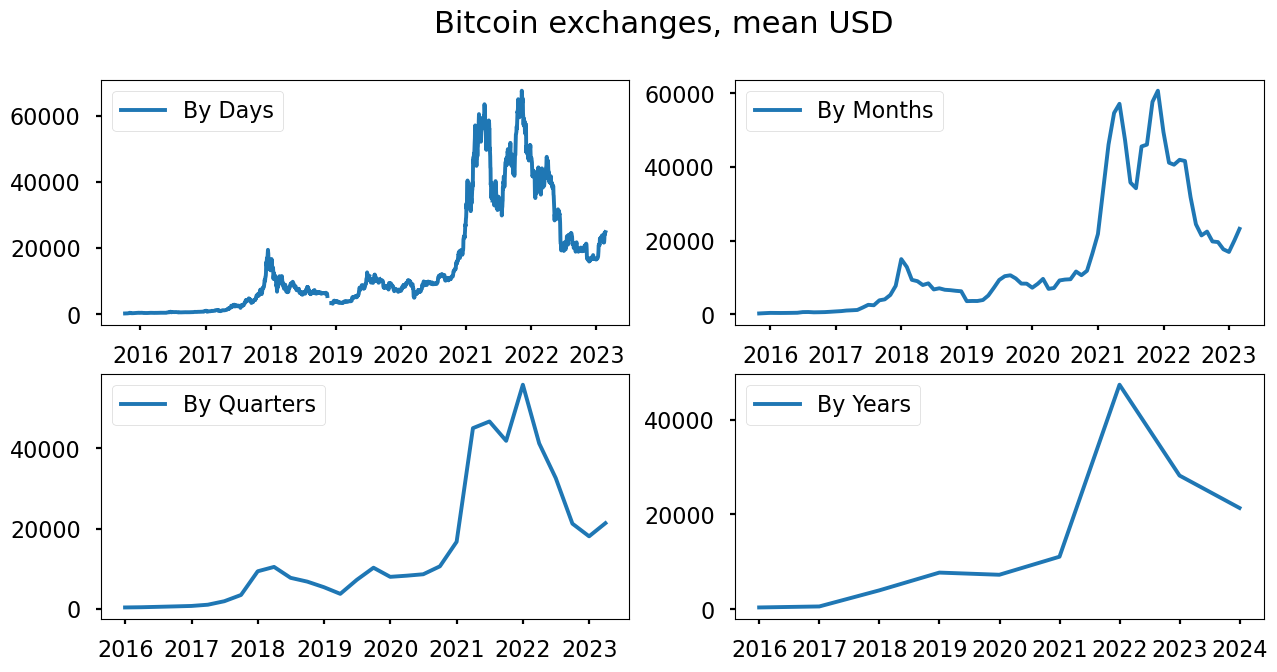

In [7]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

## Stationarity Check and STL-decomposition

Dickey–Fuller test: p=0.498178


<Figure size 1300x700 with 0 Axes>

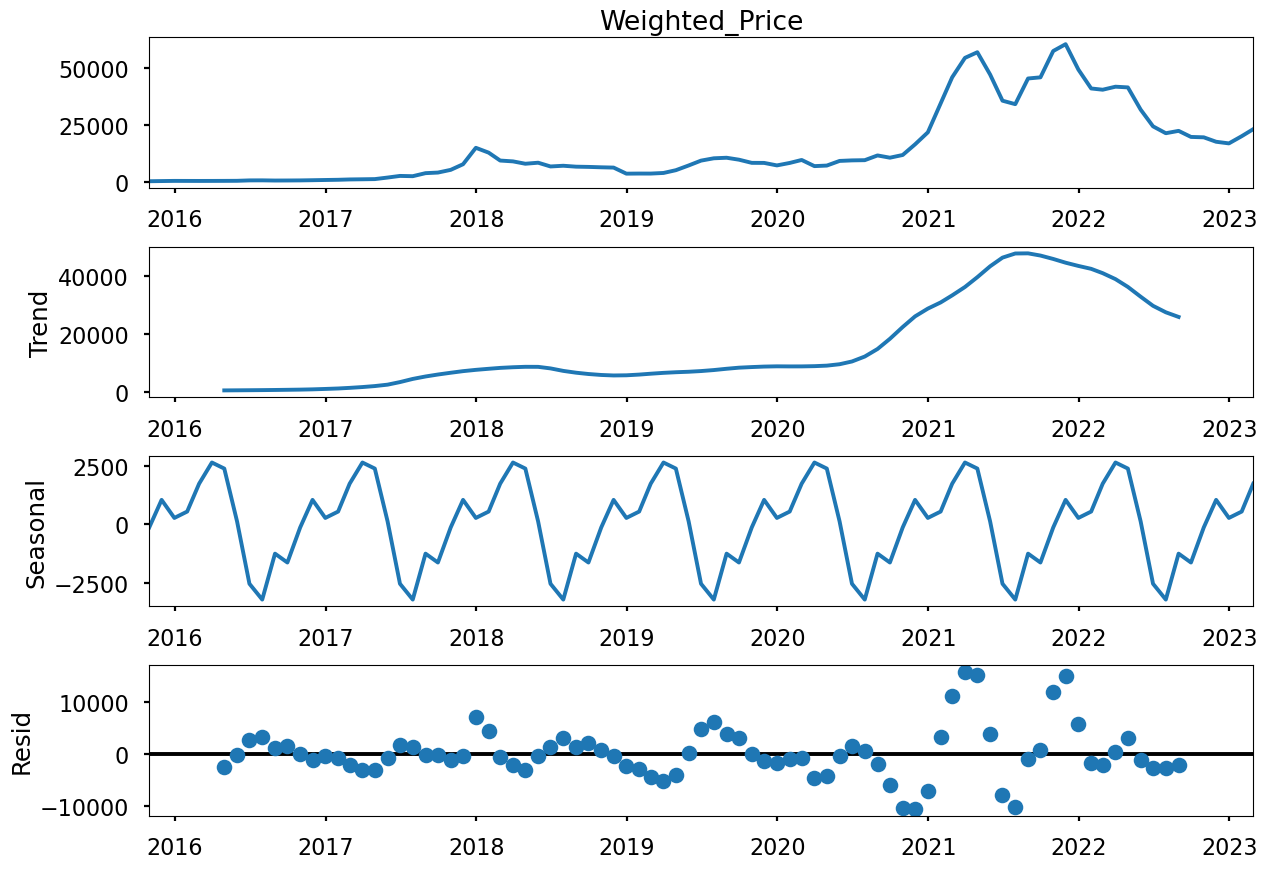

In [57]:
plt.figure(figsize=[13,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

The series are not stationary. 

## Box- Cox Transformations

In [9]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.498178


Series are not staionary.

## Seasonal Differentiation

In [10]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.587391


Series are not staionary.

## Regular Differentiation

Dickey–Fuller test: p=0.000595


<Figure size 1500x700 with 0 Axes>

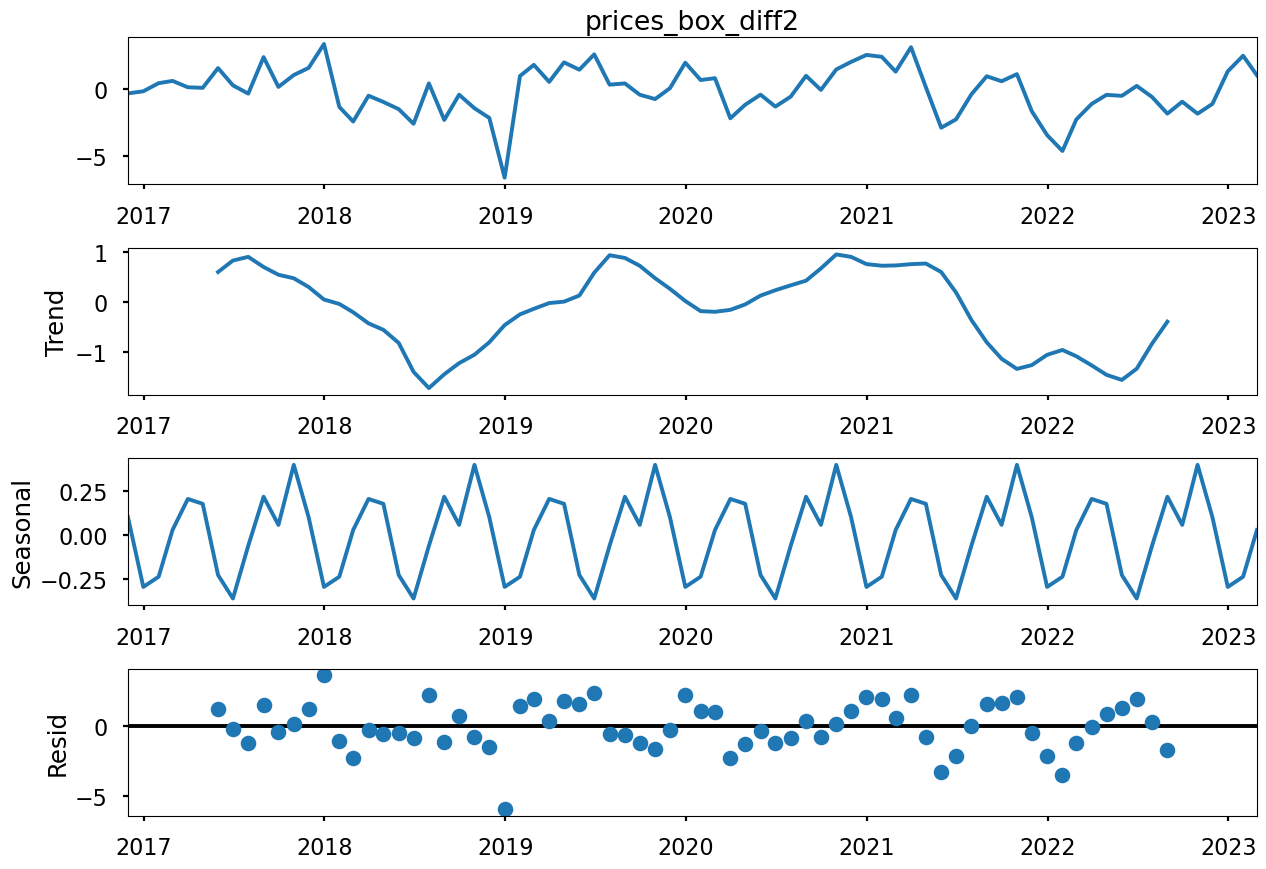

In [11]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

Series are now stationary.

## Model Selection

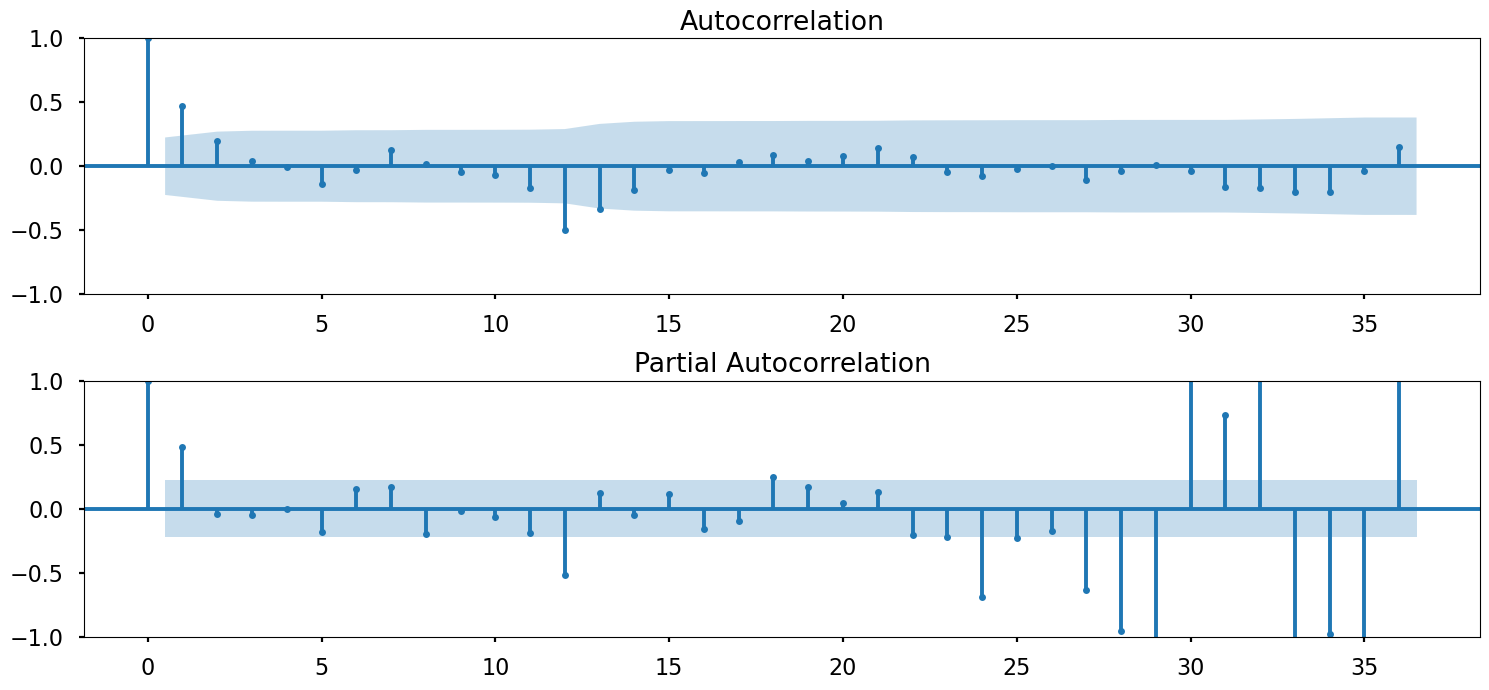

In [27]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags = 36, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags = 36, ax=ax)
plt.tight_layout()
plt.show()

In [28]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [29]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  257.370063
22  (1, 0, 2, 0)  258.026410
7   (0, 1, 0, 1)  258.507253
37  (2, 0, 0, 1)  258.909212
13  (0, 2, 0, 1)  258.953508
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                   89
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -125.685
Date:                              Wed, 02 Aug 2023   AIC                            257.370
Time:                                      12:48:24   BIC                            264.362
Sample:                                  10-31-2015   HQIC                           260.164
                                       - 02-28-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


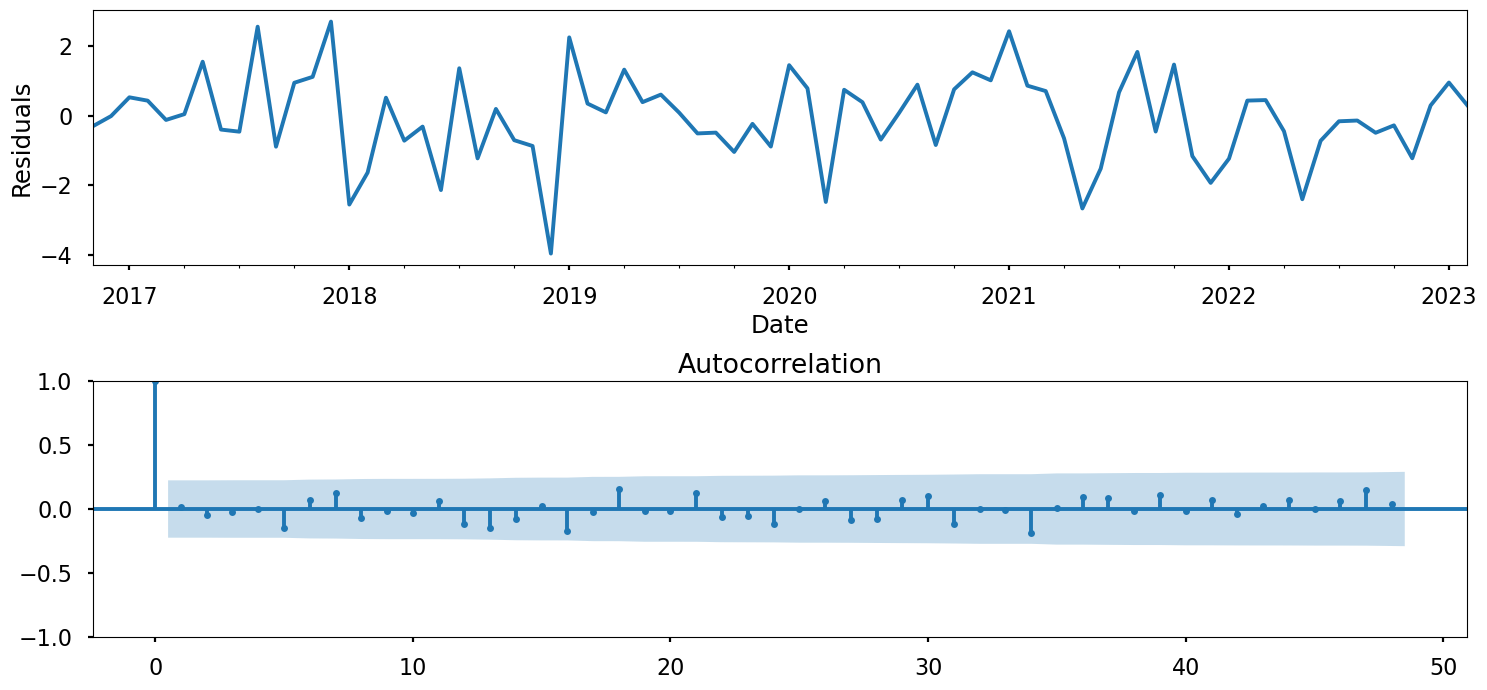

In [30]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [31]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

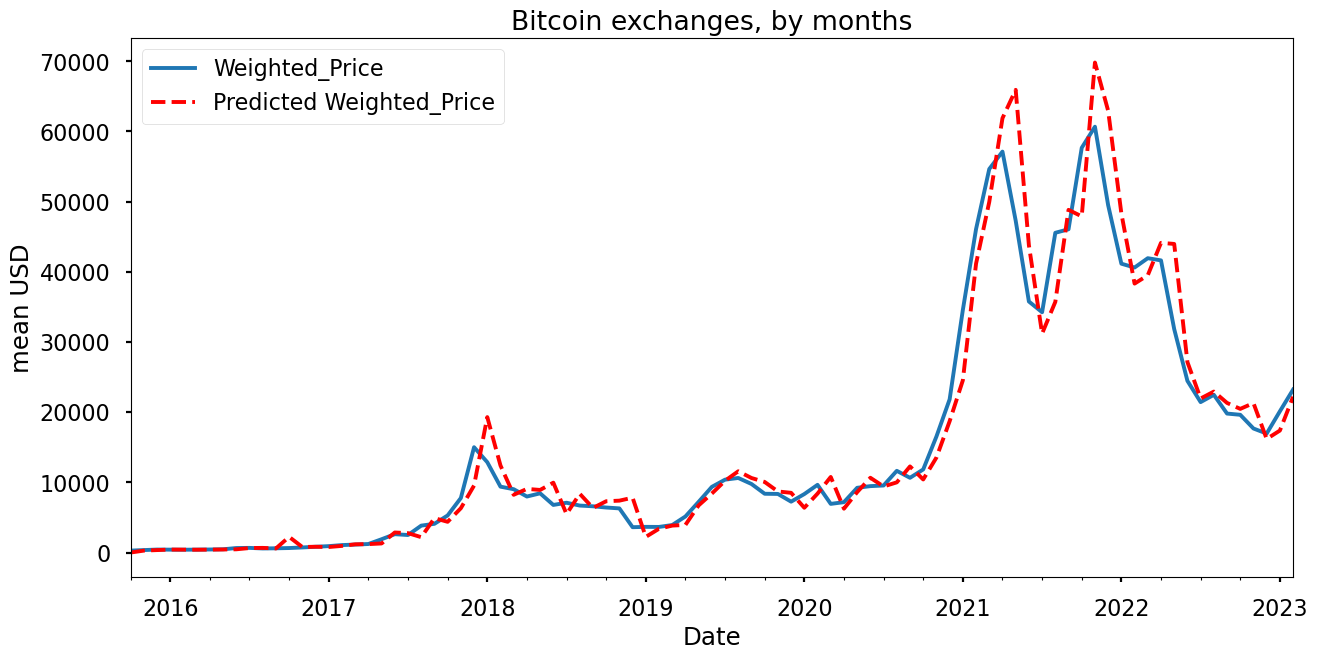

In [52]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=89), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual_values = df_month['Weighted_Price']
forecast_values = df_month2['forecast']
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

print("Mean of Actual Prices:",actual_values.mean())
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean of Actual Prices: 14820.382601019597
Mean Absolute Error (MAE): 2348.498541656533
Mean Squared Error (MSE): 16749139.05872847
Root Mean Squared Error (RMSE): 4092.5712038678653
Mean Absolute Percentage Error (MAPE): 19.57409413690174
